In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [3]:
df_test.drop('id',axis=1,inplace=True)
df_train.drop('id',axis=1,inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le = LabelEncoder()
le_1 = LabelEncoder()
ord = OrdinalEncoder()
df_train['location_type'] = le.fit_transform(df_train['location_type'])
df_test['location_type'] = le.transform(df_test['location_type'])
df_train['land_use'] = le_1.fit_transform(df_train['land_use'])
df_test['land_use'] = le_1.transform(df_test['land_use'])
df_train['zoning_code'] = ord.fit_transform(df_train[['zoning_code']])
df_test['zoning_code'] = ord.transform(df_test[['zoning_code']])

In [5]:
target_col = 'target'
id_col = 'id'

In [6]:
categorical_cols = ['location_type','proximity_road','proximity_water','urban_zone','protected_area','flood_risk','earthquake_risk','internet_access','historical_site','land_use','zoning_code','proximity_public_transport']
numerical_cols = [col for col in df_train.columns if col not in categorical_cols + [target_col,id_col]]

In [7]:
def handle_outliers(df, columns):
    df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR


        df[col] = np.where(df[col] > upper_limit, Q3, df[col])
        df[col] = np.where(df[col] < lower_limit, Q1, df[col])
    return df

<Axes: ylabel='distance_city_center_km'>

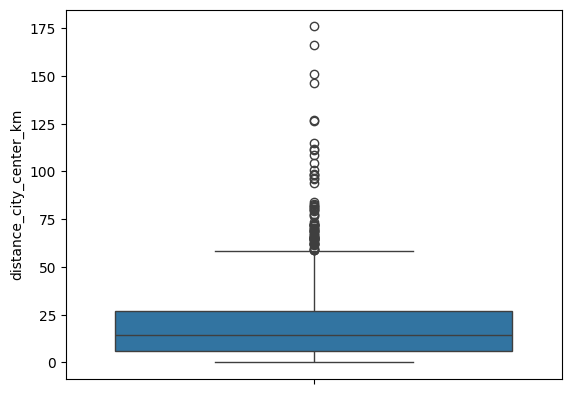

In [8]:
sns.boxplot(df_train['distance_city_center_km'])

In [9]:
df_train_hand_outliers=df_train[numerical_cols]
df_train_hand_outliers = handle_outliers(df_train,df_train_hand_outliers)

In [10]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_2 = LinearRegression()
from sklearn.model_selection import train_test_split

In [11]:
x_train_hand_outliers = df_train_hand_outliers.drop('target',axis=1)
y_train_hand_outliers = df_train['target']
df_x_train=df_train.drop('target',axis=1)
df_y_train=df_train['target']

In [12]:
x_train_hand_outliers

,location_type,altitude,area_sq_m,slope_deg,soil_quality,distance_city_center_km,distance_to_school_km,distance_to_hospital_km,distance_to_market_km,distance_to_industry_km,...,avg_property_age,distance_nearest_park_km,proximity_public_transport,pedestrian_index,employer_density,school_density,hospital_density,amenities_score,price_per_m2,land_area_m2
0,21,860.0,384.0,29.9,0.06,14.70,0.4,6.5,0.2,11.8,...,11.4,0.59,1,0.24,19.2,2.1,4.9,0.49,19.53,384.0
1,2,1294.0,543.0,7.1,0.63,0.80,9.0,9.5,5.2,18.0,...,18.9,1.23,1,0.62,114.9,12.5,3.8,0.81,21.63,543.0
2,3,1130.0,1067.0,5.3,0.77,1.70,5.6,7.8,7.0,15.9,...,31.3,4.34,1,0.02,54.4,2.9,0.7,0.93,16.70,1067.0
3,11,1095.0,864.0,34.4,0.99,22.30,8.7,8.0,9.4,10.9,...,28.1,2.92,1,0.56,11.7,1.6,0.9,0.56,23.73,864.0
4,11,1638.0,1208.0,30.2,0.01,23.40,8.3,5.3,1.8,8.4,...,32.0,2.74,1,0.82,69.2,1.7,3.7,0.14,25.15,1208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,27,1121.0,724.0,29.4,0.62,27.05,2.1,5.8,7.0,10.5,...,11.1,4.40,1,0.19,4.1,6.7,0.9,0.07,11.47,724.0
1496,8,130.0,716.0,20.7,0.13,7.70,3.4,1.7,3.6,5.8,...,13.1,2.47,1,0.38,96.9,4.5,1.2,0.18,15.88,716.0
1497,2,2852.0,988.0,30.4,0.12,27.05,7.8,4.2,0.5,11.9,...,28.2,1.75,1,0.84,11.0,6.3,1.0,0.38,19.67,988.0
1498,3,1194.0,726.0,27.8,0.84,37.40,1.9,4.6,1.6,0.5,...,16.4,3.98,1,0.36,22.5,1.8,2.0,0.18,23.87,726.0


<Axes: ylabel='distance_city_center_km'>

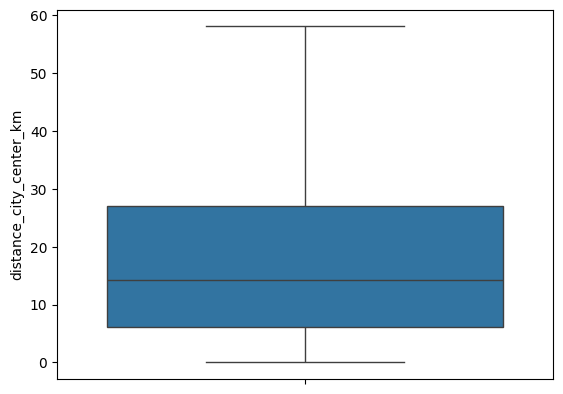

In [13]:
sns.boxplot(x_train_hand_outliers['distance_city_center_km'])

In [14]:
x_train_hand_outliers,x_test_hand_outliers,y_train_hand_outliers,y_test_hand_outliers = train_test_split(x_train_hand_outliers,y_train_hand_outliers,test_size=0.2,random_state=42)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(df_x_train,df_y_train,test_size=0.2,random_state=42)

In [16]:
model_1.fit(x_train,y_train)

LinearRegression()

In [17]:
model_2.fit(x_train_hand_outliers,y_train_hand_outliers)

LinearRegression()

In [18]:
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
r2_train_hand_outliers = r2_score(y_train_hand_outliers,model_2.predict(x_train_hand_outliers))
r2_test_hand_outliers = r2_score(y_test_hand_outliers,model_2.predict(x_test_hand_outliers))
r2_train = r2_score(y_train,model_1.predict(x_train))
r2_test = r2_score(y_test,model_1.predict(x_test))

In [20]:
r2_train_hand_outliers

0.9300640753652858

In [21]:
r2_test_hand_outliers

0.9233174958505681

In [22]:
r2_test

0.9576012590424251

In [23]:
r2_train

0.9493290668519657

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)
df_x_train = poly.fit_transform(df_x_train)
df_test = poly.transform(df_test)

In [25]:
model_3 = LinearRegression()
model_3.fit(x_train,y_train)

LinearRegression()

In [26]:
r2_train = r2_score(y_train,model_3.predict(x_train))
r2_test = r2_score(y_test,model_3.predict(x_test))

In [27]:
r2_train

0.9937479633086405

In [28]:
r2_test

0.8781318984512424

In [29]:
from sklearn.linear_model import ElasticNet
model_4 = ElasticNet(alpha=0.2)
model_4.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.596e+08, tolerance: 4.116e+06
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.2)

In [30]:
r2_train = r2_score(y_train,model_4.predict(x_train))
r2_test = r2_score(y_test,model_4.predict(x_test))

In [31]:
r2_train

0.9882820261114161

In [32]:
r2_test

0.9435729181350822

In [33]:
from sklearn.linear_model import Ridge
model_5 = Ridge(alpha=0.1)
model_5.fit(x_train,y_train)

Ridge(alpha=0.1)

In [34]:
r2_train = r2_score(y_train,model_5.predict(x_train))
r2_test = r2_score(y_test,model_5.predict(x_test))

In [35]:
r2_train

0.9925398589146518

In [36]:
r2_test

0.9042081209236156

In [37]:
from sklearn.linear_model import Lasso
model_6 = Lasso(alpha=0.1)
model_6.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.702e+08, tolerance: 4.116e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [38]:
r2_train = r2_score(y_train,model_6.predict(x_train))
r2_test = r2_score(y_test,model_6.predict(x_test))

In [39]:
r2_train

0.9926604632099503

In [40]:
r2_test

0.907672050380566

In [41]:
model_7 = ElasticNet(alpha=0.2)
model_7.fit(df_x_train,df_y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.967e+08, tolerance: 5.331e+06
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.2)

In [42]:
r2_train = r2_score(df_y_train,model_7.predict(df_x_train))

In [43]:
r2_train

0.9858372536338599

In [44]:
test_pred = model_7.predict(df_test)

ids = [f"id_{i}" for i in range(len(test_pred))]

submission = pd.DataFrame({
    "id": ids,
    "target": test_pred
})

submission.to_csv("submission_file.csv", index=False)

print("submission.csv saved!")

submission.csv saved!
